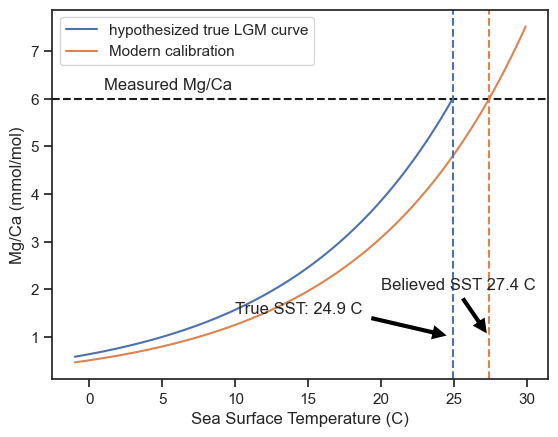

In [75]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Mg/Ca = 0.51*exp(0.09*temp) (Anand et al., 2003)
# plot this relationship
modern_temp = np.arange(-1, 30, 0.1)
modern_mgca = 0.51*np.exp(0.09*modern_temp)
## shift lgm to 2.5 degrees colder, but the total range is 0-25 degrees
lgm_temp = np.arange(-1, 25, 0.1)
lgm_mgca = 0.51*np.exp(0.09*(lgm_temp+2.5))

sns.set_style('whitegrid')
#sns.set_context('talk')
sns.set_theme(style="ticks", color_codes=True)


## plot both modern and LGM mg/ca vs temperature
sns.lineplot(x=lgm_temp, y=lgm_mgca, label='hypothesized true LGM curve')
sns.lineplot(x=modern_temp, y=modern_mgca, label='Modern calibration')
plt.xlabel('Sea Surface Temperature (C)')
plt.ylabel('Mg/Ca (mmol/mol)')

## plot a horizontal line at 6 mmol/mol
plt.axhline(y=6, color='k', linestyle='--')

## plot corresponding vertical line with consistent color as lineplot
plt.axvline(x=lgm_temp[np.argmin(np.abs(lgm_mgca-6))], color=sns.color_palette()[0], linestyle='--')
plt.axvline(x=modern_temp[np.argmin(np.abs(modern_mgca-6))], color=sns.color_palette()[1], linestyle='--')

## add annotation, believed reconstructed SST, true SST at 6 mmol/mol
## plot at y=1
plt.annotate('Measured Mg/Ca', xy=(1, 6.2))

plt.annotate('True SST: 24.9 C', xy=(lgm_temp[np.argmin(np.abs(lgm_mgca-6))], 1), xytext=(10, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05))

plt.annotate('Believed SST 27.4 C', xy=(modern_temp[np.argmin(np.abs(modern_mgca-6))], 1), xytext=(20, 2),
             arrowprops=dict(facecolor='black', shrink=0.05))

# export figure
plt.savefig('../output/mgca_calibration.png', dpi=300, bbox_inches='tight')